In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def step(x):
    return np.where(x>0,1,0)

In [6]:
def linear(x):
    return x

In [18]:
def relu(x):
    return np.where(x>0,x,0)

In [176]:
def softmax(x):
    x = x- np.max(x,axis=1).reshape(-1,1)
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [188]:
def cross_entropy(y,t):
    return -np.sum(t*np.log(y))

In [189]:
cross_entropy(l3,y_train[:500])

9.185588

In [174]:
x = x- np.max(x,axis=1).reshape(-1,1)
x

array([[-2, -1,  0],
       [-7, -6,  0],
       [-1, -1,  0]])

In [175]:
np.sum(np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1))

3.0

In [154]:
softmax([1,2,3])

array([[0.00426978, 0.01160646, 0.03154963],
       [0.08576079, 0.23312201, 0.63369132]])

In [155]:
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
def cross_entropy(x):
    

In [20]:
x = np.random.randn(3,3)

In [24]:
x = np.random.randn(50)

In [31]:
relu(x)

array([0.        , 0.        , 0.47984216, 0.        , 0.        ,
       0.22611216, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.22225467, 0.        ,
       1.25069011, 0.        , 0.59178425, 0.        , 0.        ,
       0.        , 0.        , 0.53128114, 0.        , 0.71132651,
       1.51868848, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.24555769, 0.        , 0.75189617, 0.        ,
       2.28779828, 0.        , 0.13996777, 0.37836072, 1.27856849,
       0.        , 0.63071989, 0.        , 0.41785135, 0.63375945,
       0.36701645, 0.        , 0.        , 0.        , 0.        ])

In [8]:
x = np.linspace(-5,5,100)

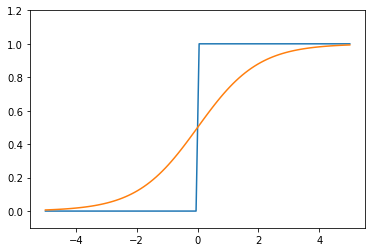

In [16]:
plt.ylim(-0.1,1.2)
#plt.plot(x,linear(x))
plt.plot(x,step(x))
plt.plot(x,sigmoid(x))

In [35]:
from keras.datasets import mnist

In [36]:
from tensorflow import keras

In [37]:
from keras.datasets import mnist

In [38]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

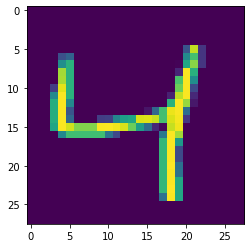

In [46]:
plt.imshow(X_train[2])

In [48]:
X_train = X_train.reshape(-1,28*28)

In [49]:
X_train

(60000, 784)

In [51]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512,activation='relu',input_shape=(784,)))
model.add(keras.layers.Dense(256,activation='sigmoid'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [66]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [96]:
W1 = model.layers[0].get_weights()[0]
b1 = model.layers[0].get_weights()[1]
W2 = model.layers[1].get_weights()[0]
b2 = model.layers[1].get_weights()[1]
W3 = model.layers[2].get_weights()[0]
b3 = model.layers[2].get_weights()[1]

In [179]:
l1 = np.dot(X_train[:500],W1) + b1
l1 = relu(l1)

In [180]:
l2 = np.dot(l1,W2) + b2
l2 = sigmoid(l2)

<ipython-input-3-3cbdbdecc9c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [181]:
l3 = np.dot(l2,W3) + b3
l3 = softmax(l3)

In [187]:
np.sum(l3)

500.0

In [147]:
def func2(x):
    return x**3+3*x

In [145]:
def grad(f,x):
    h = 1e-7
    fxh = f(x+h)
    fx = f(x)
    return (fxh - fx)/h

In [149]:
grad(func2,5)

78.00000162205833

In [89]:
model.fit(X_train,y_train,epochs=100,batch_size=400)

Epoch 1/100
150/150 [==============================] - 3s 15ms/step - loss: 0.4307 - accuracy: 0.8850
Epoch 2/100
150/150 [==============================] - 2s 16ms/step - loss: 0.2004 - accuracy: 0.9414
Epoch 3/100
150/150 [==============================] - 2s 16ms/step - loss: 0.1542 - accuracy: 0.9545
Epoch 4/100
150/150 [==============================] - 2s 15ms/step - loss: 0.1311 - accuracy: 0.9611
Epoch 5/100
150/150 [==============================] - 2s 16ms/step - loss: 0.1126 - accuracy: 0.9660
Epoch 6/100
150/150 [==============================] - 2s 16ms/step - loss: 0.1035 - accuracy: 0.9679
Epoch 7/100
150/150 [==============================] - 2s 16ms/step - loss: 0.0948 - accuracy: 0.9710
Epoch 8/100
150/150 [==============================] - 2s 16ms/step - loss: 0.0859 - accuracy: 0.9738
Epoch 9/100
150/150 [==============================] - 2s 16ms/step - loss: 0.0797 - accuracy: 0.9755
Epoch 10/100
150/150 [==============================] - 2s 16ms/step - loss: 0.074

In [85]:
W1_1 = model.layers[0].get_weights()[0]

In [91]:
np.argmax(model.predict(X_train[[912]]))

1/1 [==============================] - 0s 29ms/step


5

In [92]:
np.argmax(y_train[912])

5

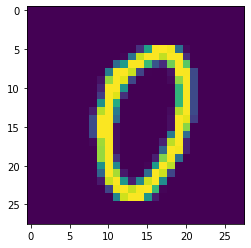

In [116]:
plt.imshow(X_train[1000].reshape(28,28))

In [190]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(512,activation='relu',input_shape=(784,)),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(10,activation='softmax'),
    ]
)

In [191]:
W1 = model.layers[0].get_weights()[0]
b1 = model.layers[0].get_weights()[1]
W2 = model.layers[1].get_weights()[0]
b2 = model.layers[1].get_weights()[1]
W3 = model.layers[2].get_weights()[0]
b3 = model.layers[2].get_weights()[1]

In [198]:
l1 = np.dot(X_train,W1) + b1
l1 = relu(l1)
l2 = np.dot(l1,W2) + b2
l2 = relu(l2)
l3 = np.dot(l2,W3) + b3
l3 = softmax(l3)

In [196]:
np.argmax(y_train[0])

5

In [199]:
cross_entropy(l3,y_train)

<ipython-input-188-398ac9b8e706>:2: RuntimeWarning: divide by zero encountered in log
  return -np.sum(t*np.log(y))
<ipython-input-188-398ac9b8e706>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(t*np.log(y))


nan